# Case Study - Image Classification using Deep CNN in Keras.


<h1>Context<h1/>

- The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
- The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
- There are 6,000 images of each class.

<h2>Understand the labels:<h2/>

- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

## George's Challenge
What type of classification is this?

<h1>Problem Statement<h1/>

- Image Classification using Deep CNN in Keras and also some edge detection operation.


<h1>Import all necessary modules and load the data<h1/>

In [1]:
# Import necessary modules.
import numpy as np

from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from google.colab.patches import cv2_imshow

In [3]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 30
num_predictions = 20

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
# Print the shape of dataset.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
y_train.shape

(50000, 1)

- The training set contains 50000 images.
- The size of each image is 32x32 pixels.
- Each image has 3 color channels.

In [7]:
y_train[0]

array([6], dtype=uint8)

## George's Challenge
- How to select the 10th image?
- How to get the red pixels only?
- What is the shape of resulting array?

- The label of image at index = 0 is 6:"frog".

In [14]:
label_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


<h2>Explore the Data<h3/>

- Understanding a dataset is part of making predictions on the data. 
- It answers some of questions like in a given data..
  - "What are the possible labels?"
  - "What is the range of pixel values for the image data?"


 Label 
 Label Id: 6 
 Name: frog


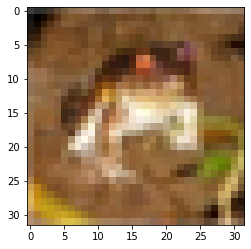

In [15]:
i = 0
image = x_train[i]
label = y_train[i][0]
print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
plt.imshow(image);

- The above image of a frog.
- The Label ID is 6.
- As we can see the x-axis and y-axis of image, it shows that there are 32 pixels on each directions.

In [16]:
image.shape

(32, 32, 3)

## George's Challenge
- Without checking, what is the shape of `image`
- How to rewrite the print statement using `f-string`?
- Why do we need to use `[0]` in `label = y_train[i][0]`?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


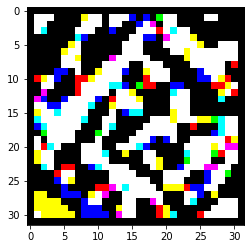

In [21]:
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

- As the image quality is not good, the edges are not so good. But still we can visualize that there are edges.

In [22]:
#Convert class vectors to binary class matrices.
## One hot encore labels 0, 1, .., 9 to [0, 0, .., 1, 0, 0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## George's Challenge
Why do we need to one-hot encode the labels?

## George's Tip
There are many tools to one-hot encode and they differ in syntax, but the keras one is probably best implemented.
- `keras.utils.to_categorical`
- `sklearn.preprocessing.OneHotEncoder`
- `pandas get_dummies`

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
y = [[0], [1], [2], [3]]

In [24]:
keras.utils.to_categorical(y)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [27]:
ohe = OneHotEncoder()
ohe.fit_transform(y).toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [30]:
y = [0, 1, 2, 3]
pd.get_dummies(y).values

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

<h1>Create the Model:<h1/>

- Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
- Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- Flatten layer.
- Fully connected layer with 512 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 10 units and a softmax activation function.


In [31]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

## George's Tip
> Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers.

https://keras.io/api/layers/activations/

<h3>Conv2D:<h3/>

- Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

<h3>Activation('relu'):<h3/>

- 'relu' stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.
- ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

<h3>MaxPooling2D:<h3/>

- The objective of MaxPooling Layer is to down-sample an input representation.
- This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn.

<h3>Dropout:<h3/>

- Dropout is a technique used to improve over-fit on neural networks.
- Basically during training half of neurons on a particular layer will be deactivated. This improve generalization.
- Normally some deep learning models use Dropout on the fully connected layers, but is also possible to use dropout after the max-pooling layers, creating some kind of image noise augmentation.

<h3>Dense:<h3/>

- Dense layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

<h3>Softmax:<h3/>

- The softmax function is also a type of sigmoid function but is handy when we are trying to handle classification problems.
- Usually used when trying to handle multiple classes. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs.
______________

## George's Challenge
How to handle multilabel classification?

<h4>When training the network, what you want is minimize the cost by applying a algorithm of your choice. It could be SGD, AdamOptimizer, AdagradOptimizer, or something. You have to study how each algorithm works to choose what to use, but AdamOptimizer works find for most cases in general.<h4/>

In [34]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [35]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## George's Tip
Which loss function to use? It depends :)

https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances

In [36]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

- The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

- It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

- Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [38]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [39]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

## George's Tip
> Passing an integer after the ':' will cause that field to be a minimum number of characters wide. This is useful for making columns line up.

https://docs.python.org/3/tutorial/inputoutput.html#:~:text=There%20are%20several%20ways%20to%20format%20output.,to%20variables%20or%20literal%20values.

<h2>Fit the model:<h2/>

-  We can fit this model with 30 epochs and a batch size of 32.

- A small number of epochs was chosen to quickly run the code so we can understand the concepts ahead. Normally the number of epochs would be one or two orders of magnitude larger for this problem.

In [40]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          verbose=1,
          callbacks=[early_stopping,model_checkpoint])

Epoch 1/30
1562/1563 [============================>.] - ETA: 0s - loss: 2.1165 - accuracy: 0.2174
Epoch 00001: val_loss improved from inf to 1.98225, saving model to cifar_cnn_checkpoint_01_loss1.9823.h5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1165 - accuracy: 0.2174 - val_loss: 1.9823 - val_accuracy: 0.2840
Epoch 2/30
1557/1563 [============================>.] - ETA: 0s - loss: 1.9711 - accuracy: 0.2827
Epoch 00002: val_loss improved from 1.98225 to 1.89885, saving model to cifar_cnn_checkpoint_02_loss1.8989.h5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9708 - accuracy: 0.2827 - val_loss: 1.8989 - val_accuracy: 0.3095
Epoch 3/30
1562/1563 [============================>.] - ETA: 0s - loss: 1.9110 - accuracy: 0.3061
Epoch 00003: val_loss improved from 1.89885 to 1.83276, saving model to cifar_cnn_checkpoint_03_loss1.8328.h5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9109 - accuracy: 0.3062 - val_loss: 1.8328 - va

<h2>Model Score:<h2/>

- Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy

In [41]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.1704 - accuracy: 0.5900
Test loss: 1.170371413230896
Test accuracy: 0.5899999737739563


<h3>The above score shows that the accuracy is good, as we used number of epochs = 30.
If we use more epochs and tune the hyper-parameters more then we can get some more accuracy score. As our focus on the case study was to learn about the use of CNNs for image classification, we needed to run the code thoroughly so we set number of epochs to less. <h3/>

# Summary:

<h3>In this case study we discovered how to create deep CNNs in Keras for image classification.<h3/>

After working through this case study we learned:

- About the CIFAR-10 dataset and how to load it in Keras and plot examples from the dataset.
- How to train and evaluate a Convolutional Neural Network on the problem.


## George's Bonus $$$
__Model training diagnosis using learning curve__
- Early stopping https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
- Benefits of using pooling layers https://stats.stackexchange.com/questions/288261/why-is-max-pooling-necessary-in-convolutional-neural-networks
- Why padding? https://stats.stackexchange.com/questions/246512/convolutional-layers-to-pad-or-not-to-pad
- Learning Curve  https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
- Cross Validate Keras models  https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
- More CNN's 
  - https://www.youtube.com/watch?v=YRhxdVk_sIs   
  - https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
- Neural Network Architectures  https://towardsdatascience.com/neural-network-architectures-156e5bad51ba 

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

Epoch 1/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7590 - accuracy: 0.3509 - val_loss: 1.4537 - val_accuracy: 0.4676
Epoch 2/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4314 - accuracy: 0.4825 - val_loss: 1.2706 - val_accuracy: 0.5530
Epoch 3/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2921 - accuracy: 0.5372 - val_loss: 1.1912 - val_accuracy: 0.5729
Epoch 4/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1986 - accuracy: 0.5768 - val_loss: 1.0818 - val_accuracy: 0.6172
Epoch 5/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1216 - accuracy: 0.6041 - val_loss: 1.0468 - val_accuracy: 0.6264
Epoch 6/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0579 - accuracy: 0.6258 - val_loss: 0.9801 - val_accuracy: 0.6552
Epoch 7/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0135 - accuracy: 0.6442 - val_loss: 0.9304 - val_accuracy:

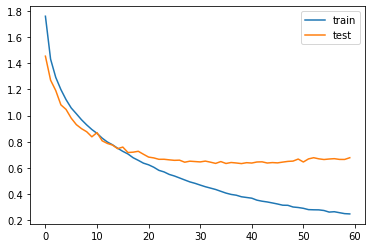

In [25]:
history = model.fit(
    x_train, 
    y_train,
    batch_size=batch_size,
    epochs=60,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=1
)

# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/100
1558/1563 [============================>.] - ETA: 0s - loss: 1.8014 - accuracy: 0.3358
Epoch 00001: val_loss improved from inf to 1.48130, saving model to cifar_cnn_checkpoint_01_loss1.4813.h5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8008 - accuracy: 0.3360 - val_loss: 1.4813 - val_accuracy: 0.4639
Epoch 2/100
1558/1563 [============================>.] - ETA: 0s - loss: 1.4550 - accuracy: 0.4702
Epoch 00002: val_loss improved from 1.48130 to 1.31681, saving model to cifar_cnn_checkpoint_02_loss1.3168.h5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4550 - accuracy: 0.4702 - val_loss: 1.3168 - val_accuracy: 0.5321
Epoch 3/100
1555/1563 [============================>.] - ETA: 0s - loss: 1.3233 - accuracy: 0.5255
Epoch 00003: val_loss improved from 1.31681 to 1.18158, saving model to cifar_cnn_checkpoint_03_loss1.1816.h5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3231 - accuracy: 0.5255 - val_loss: 1.1816 -

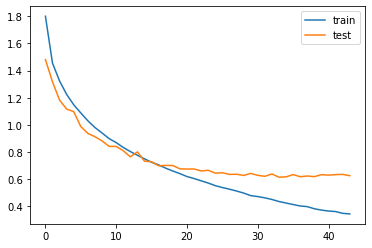

In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10, 
    min_delta=0.001
)

ckpt = ModelCheckpoint(
    'cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True,
    mode='min'
)

history = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=100, 
    verbose=1, 
    callbacks=[es, ckpt]
)

from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [34]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.6243 - accuracy: 0.7977
Test loss: 0.624273419380188
Test accuracy: 0.7976999878883362
